# Basic Data Analysis
## fa-23-team-a

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("bu_athletics_data.csv")
df.head()

,Data Input Year,Student,State,US Region,Country,English Language Primary Language of Country,IPEDS Race Description,Athletic Code 1,Team Gender,Athletic Code Description 1,...,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
0,2022,1,NaN,NaN,Canada,English,Non-Resident Alien,HC,M,MEN'S ICE HOCKEY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,2,CT,NaN,NaN,NaN,African American or Black,SC,M,MEN'S SOCCER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,3,CA,NaN,NaN,NaN,White,MC,M,MEN'S ROWING,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,14,NaN,NaN,Italy,Non-English,Non-Resident Alien,SC,M,MEN'S SOCCER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,15,NaN,NaN,Germany,Non-English,Non-Resident Alien,MC,M,MEN'S ROWING,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Range of accepted highschool GPA

In [9]:
max_hs_gpa = df["HSGPA"].max()
min_hs_gpa = df["HSGPA"].min()
print("Maximum highschool GPA:", max_hs_gpa)
print("Minimum highschool GPA:", min_hs_gpa)

Maximum highschool GPA: 4.3
Minimum highschool GPA: 2.2


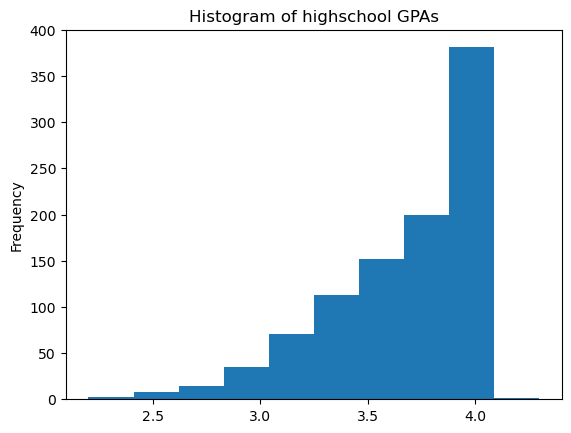

In [10]:
hsgpa_no_na = df["HSGPA"].dropna()
plt.hist(hsgpa_no_na, bins=10)
plt.title("Histogram of highschool GPAs")
plt.ylabel("Frequency")
plt.show()

### Range of accepted SAT/ACT scores

In [11]:
min_sat = df["SATCFORAI"].min()
max_sat = df["SATCFORAI"].max()
print("Maximum SAT score:", max_sat)
print("Minimum SAT score:", min_sat)

Maximum SAT score: 1600.0
Minimum SAT score: 950.0


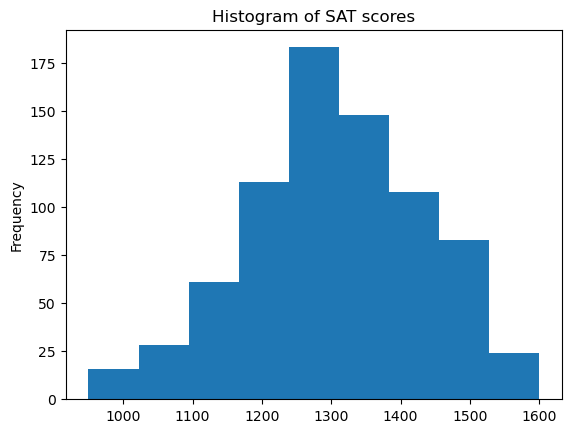

In [12]:
sat_no_na = df["SATCFORAI"].dropna()
plt.hist(sat_no_na, bins=9)
plt.title("Histogram of SAT scores")
plt.ylabel("Frequency")
plt.show()

### Student composition

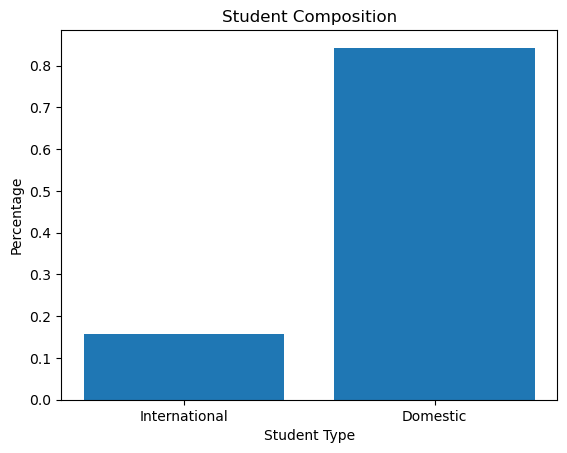

In [13]:
num_intl = df["State"].isna().sum()
num_domestic = df.shape[0] - num_intl
comp = ["International", "Domestic"]
comp_percent = [num_intl / (num_intl + num_domestic), num_domestic / (num_intl + num_domestic)]
plt.bar(comp, comp_percent, width=0.8)
plt.xlabel("Student Type")
plt.ylabel("Percentage")
plt.title("Student Composition")
plt.show()

### Effect of English being the primary language on highschool/SAT/ACT performance

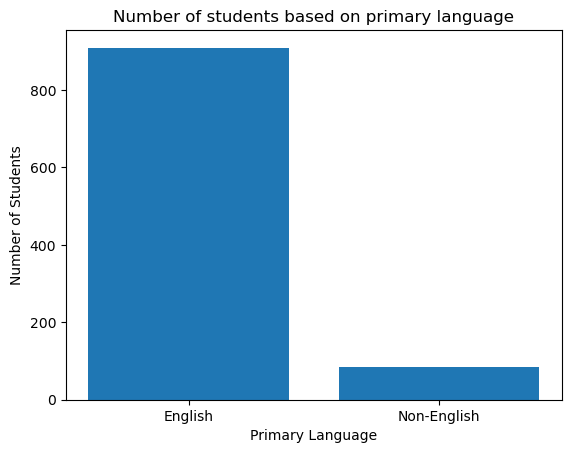

In [14]:
num_english = df[(df["State"].notna()) | 
                   (df["English Language Primary Language of Country"] == 'English')].shape[0]
num_non_english = df[df["English Language Primary Language of Country"] == 'Non-English'].shape[0]
primary_lang = ["English", "Non-English"]
count = [num_english, num_non_english]
plt.bar(primary_lang, count, width=0.8)
plt.xlabel("Primary Language")
plt.ylabel("Number of Students")
plt.title("Number of students based on primary language")
plt.show()

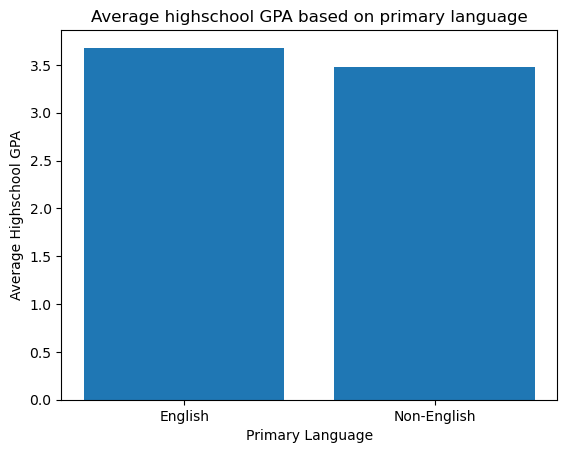

In [15]:
hsgpa_english = df[(df["State"].notna()) | 
                   (df["English Language Primary Language of Country"] == 'English')]["HSGPA"].mean()
hsgpa_non_english = df[df["English Language Primary Language of Country"] == 'Non-English']["HSGPA"].mean()
primary_lang = ["English", "Non-English"]
performance = [hsgpa_english, hsgpa_non_english]
plt.bar(primary_lang, performance, width=0.8)
plt.xlabel("Primary Language")
plt.ylabel("Average Highschool GPA")
plt.title("Average highschool GPA based on primary language")
plt.show()

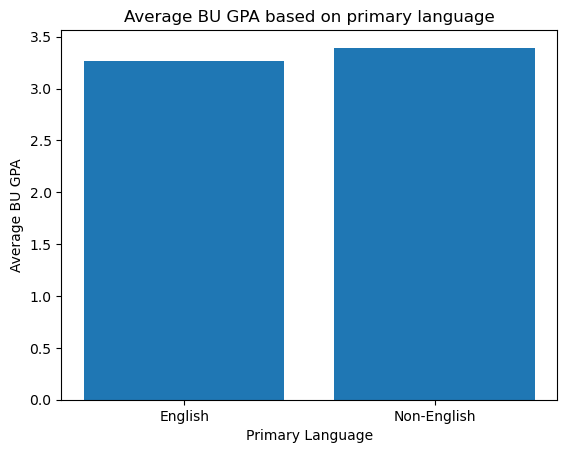

In [16]:
bugpa_english = df[(df["State"].notna()) | 
                   (df["English Language Primary Language of Country"] == 'English')]\
                ["Last Cumulative BU GPA"].mean()
bugpa_non_english = df[df["English Language Primary Language of Country"] == 'Non-English']\
                ["Last Cumulative BU GPA"].mean()
primary_lang = ["English", "Non-English"]
performance = [bugpa_english, bugpa_non_english]
plt.bar(primary_lang, performance, width=0.8)
plt.xlabel("Primary Language")
plt.ylabel("Average BU GPA")
plt.title("Average BU GPA based on primary language")
plt.show()

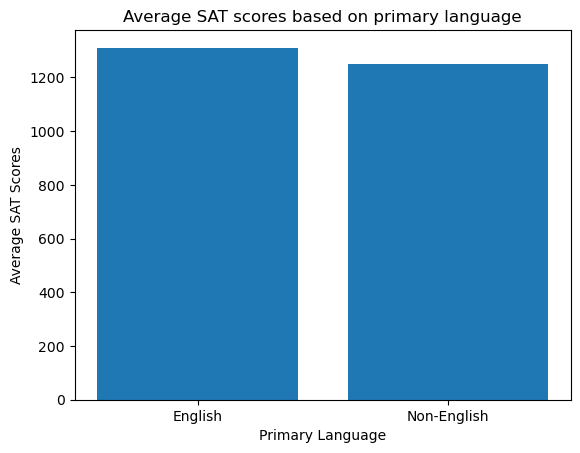

In [17]:
sat_english = df[(df["State"].notna()) | 
                   (df["English Language Primary Language of Country"] == 'English')]["SATCFORAI"].mean()
sat_non_english = df[df["English Language Primary Language of Country"] == 'Non-English']["SATCFORAI"].mean()
primary_lang = ["English", "Non-English"]
performance = [sat_english, sat_non_english]
plt.bar(primary_lang, performance, width=0.8)
plt.xlabel("Primary Language")
plt.ylabel("Average SAT Scores")
plt.title("Average SAT scores based on primary language")
plt.show()

### Range of BU GPA for athletes

In [18]:
min_bugpa = df[df["Last Cumulative BU GPA"] != 0]["Last Cumulative BU GPA"].min()
max_bugpa = df["Last Cumulative BU GPA"].max()
print("Maximum SAT score:", max_bugpa)
print("Minimum SAT score:", min_bugpa)

Maximum SAT score: 4.0
Minimum SAT score: 1.1


### Performance of similar highschool students in BU

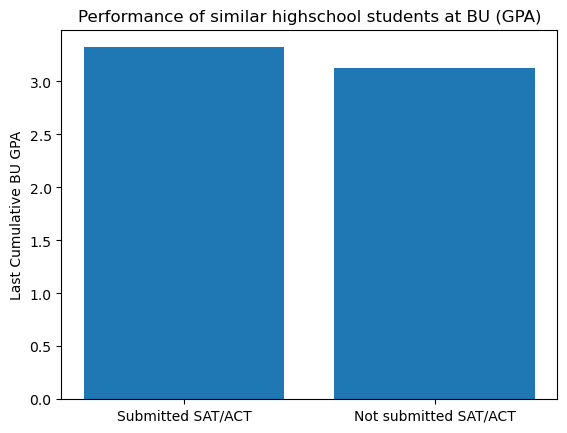

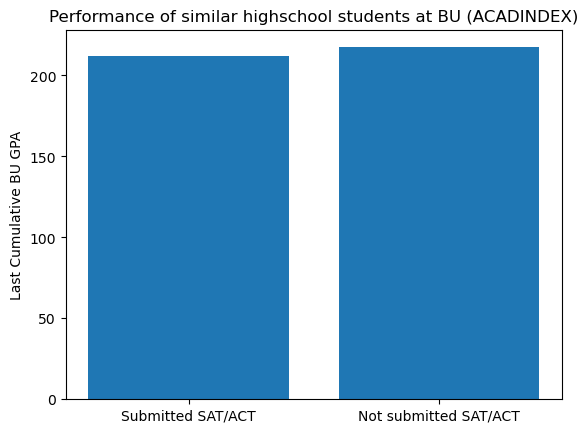

In [22]:
satact_gpa = df[(df["SATCFORAI"].notna()) | (df["ACTUSE"].notna())]["Last Cumulative BU GPA"].mean()
no_satact_gpa = df[(df["SATCFORAI"].isna()) & (df["ACTUSE"].isna())]["Last Cumulative BU GPA"].mean()
status = ["Submitted SAT/ACT", "Not submitted SAT/ACT"]
performance_gpa = [satact_gpa, no_satact_gpa]

satact_ai = df[(df["SATCFORAI"].notna()) | (df["ACTUSE"].notna())]["ACADINDEX"].mean()
no_satact_ai = df[(df["SATCFORAI"].isna()) & (df["ACTUSE"].isna())]["ACADINDEX"].mean()
status = ["Submitted SAT/ACT", "Not submitted SAT/ACT"]
performance_ai = [satact_ai, no_satact_ai]

plt.bar(status, performance_gpa, width=0.8)
plt.ylabel("Last Cumulative BU GPA")
plt.title("Performance of similar highschool students at BU (GPA)")
plt.show()

plt.bar(status, performance_ai, width=0.8)
plt.ylabel("Last Cumulative BU GPA")
plt.title("Performance of similar highschool students at BU (ACADINDEX)")
plt.show()

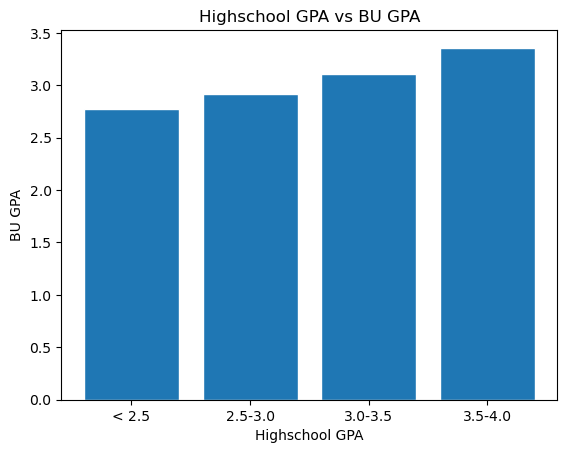

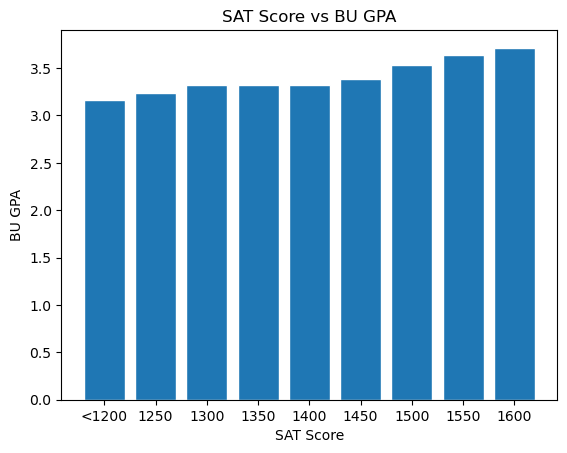

In [30]:
hsgpa_bins = np.array([0, 2.5, 3.0, 3.5, 4.0])
bugpa = [df[(df["HSGPA"] >= hsgpa_bins[i]) 
            & (df["HSGPA"] <= hsgpa_bins[i+1])]["Last Cumulative BU GPA"].dropna().mean() 
         for i in range(len(hsgpa_bins) - 1)]
plt.bar(["< 2.5", "2.5-3.0", "3.0-3.5","3.5-4.0"], bugpa, edgecolor='white', align='center')
plt.xlabel("Highschool GPA")
plt.ylabel("BU GPA")
plt.title("Highschool GPA vs BU GPA")
plt.show()

sat_bins = np.array([0, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600])
bugpa = [df[(df["SATCFORAI"] >= sat_bins[i]) 
            & (df["SATCFORAI"] <= sat_bins[i+1])]["Last Cumulative BU GPA"].dropna().mean() 
         for i in range(len(sat_bins) - 1)]
plt.bar(["<1200", "1250", "1300","1350", "1400", "1450", "1500", "1550", "1600"],
        bugpa, edgecolor='white', align='center')
plt.xlabel("SAT Score")
plt.ylabel("BU GPA")
plt.title("SAT Score vs BU GPA")
plt.show()

### Comparing performance of students across states

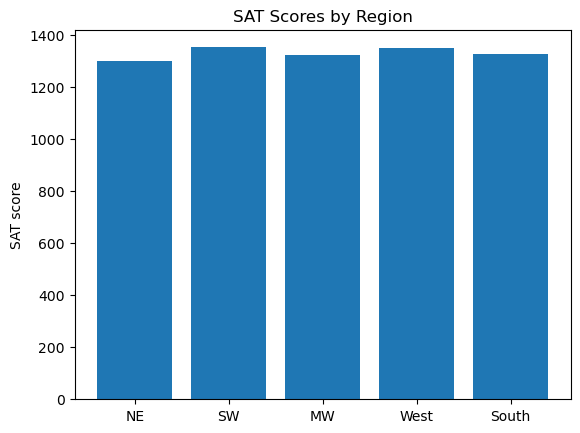

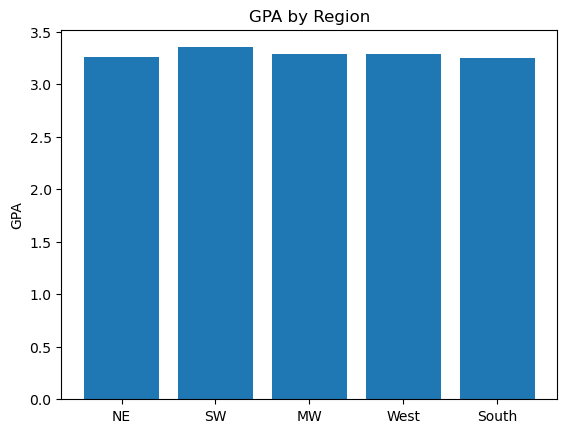

In [15]:
ne_states = ["PA", "DE", "MD", "MA", "VT", "NJ", "ME", "CT", "NY", "NH", "RI"]
sw_states = ["TX", "AZ", "NM", "OK"]
mw_states = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
w_states = ["AK", "CA", "CO", "HI", "ID", "MT", "NV", "OR", "UT", "WA", "WY"]
s_states = ["AR", "KY", "VA", "FL", "NC", "LA", "WV", "SC", "TN", "AL", "MS", "GA"]

ne_sat = df[df["State"].isin(ne_states)]["SATCFORAI"].dropna().mean()
sw_sat = df[df["State"].isin(sw_states)]["SATCFORAI"].dropna().mean()
mw_sat = df[df["State"].isin(mw_states)]["SATCFORAI"].dropna().mean()
w_sat = df[df["State"].isin(w_states)]["SATCFORAI"].dropna().mean()
s_sat = df[df["State"].isin(s_states)]["SATCFORAI"].dropna().mean()

ne_bugpa = df[df["State"].isin(ne_states)]["Last Cumulative BU GPA"].dropna().mean()
sw_bugpa = df[df["State"].isin(sw_states)]["Last Cumulative BU GPA"].dropna().mean()
mw_bugpa = df[df["State"].isin(mw_states)]["Last Cumulative BU GPA"].dropna().mean()
w_bugpa = df[df["State"].isin(w_states)]["Last Cumulative BU GPA"].dropna().mean()
s_bugpa = df[df["State"].isin(s_states)]["Last Cumulative BU GPA"].dropna().mean()

region = ["NE", "SW", "MW", "West", "South"]
region_sat = [ne_sat, sw_sat, mw_sat, w_sat, s_sat]
region_gpa = [ne_bugpa, sw_bugpa, mw_bugpa, w_bugpa, s_bugpa]

plt.bar(region, region_sat, width=0.8)
plt.ylabel("SAT score")
plt.title("SAT Scores by Region")
plt.show()

plt.bar(region, region_gpa, width=0.8)
plt.ylabel("GPA")
plt.title("GPA by Region")
plt.show()

### Comparing students gpa throughout college

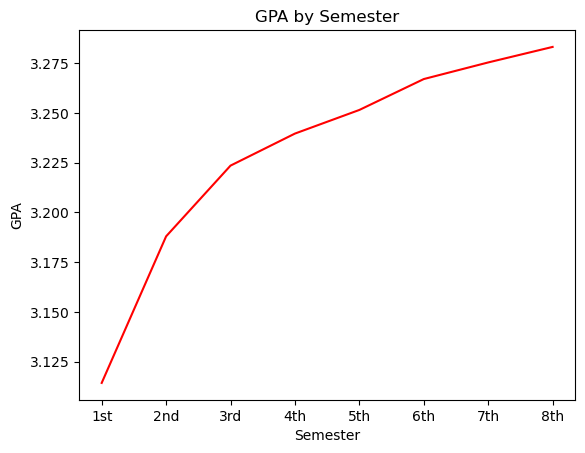

In [16]:
sems = ["1st Sem", "2nd Sem", "3rd Sem", "4th Sem", "5th Sem", "6th Sem", "7th Sem", "8th Sem"]
sems_number = [sems[i][:3] for i in range(len(sems))]
gpa_sem = [df["Cumulative GPA-" + sems[i-1]].dropna().mean() for i in range(1, 9)]

plt.plot(sems_number, gpa_sem, color="red")
plt.ylabel("GPA")
plt.xlabel("Semester")
plt.title("GPA by Semester")
plt.show()

### College majors

In [17]:
num_change = df[df["First Major (HEGIS) Description"] != df["Last Major (HEGIS) Description"]].shape[0]
p_num_change = num_change / len(df)

print("% of athletes that change majors =", np.around(p_num_change, 4))
print("% of athletes that remain in the same major =", np.around(1 - p_num_change, 4))

% of athletes that change majors = 0.2336
% of athletes that remain in the same major = 0.7664


In [38]:
df['First Major (HEGIS) Description'].value_counts().nlargest(10)

First Major (HEGIS) Description
Business Admin & Mgt    188
Economics                85
Approved Deferral        65
Health Science           60
Biology                  54
Psychology               37
Advertising              36
Mechanical Engnrng       36
Biomedical Engnrng       33
Interntl Relations       31
Name: count, dtype: int64